In [172]:
%matplotlib inline
import pandas as pd

# Setting prices to exclude decimal points
pd.set_option('precision', 2)

# Setting DataFrame columns to show all of them
pd.set_option('display.max_columns', 500)

import matplotlib.pyplot as plt
import datetime as dt

In [173]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [174]:
dtitles = pd.DataFrame.from_csv('data/test.csv', index_col=None)
dtitles = dtitles[['Id', 'BedroomAbvGr', 'FullBath', 'MoSold', 'YrSold']]
dtitles.head()

,Id,BedroomAbvGr,FullBath,MoSold,YrSold
0,1461,2,1,6,2010
1,1462,3,1,6,2010
2,1463,3,2,3,2010
3,1464,3,2,6,2010
4,1465,2,2,1,2010


In [175]:
dprices = pd.DataFrame.from_csv('data/sample_submission.csv', index_col=None)
dprices.head()

,Id,SalePrice
0,1461,169277.05
1,1462,187758.39
2,1463,183583.68
3,1464,179317.48
4,1465,150730.08


In [176]:
# Merge/combine the properties' descriptions and its sales prices into a new dataframe.
h_data = pd.merge(dtitles, dprices, on='Id')
h_data.head(4)

,Id,BedroomAbvGr,FullBath,MoSold,YrSold,SalePrice
0,1461,2,1,6,2010,169277.05
1,1462,3,1,6,2010,187758.39
2,1463,3,2,3,2010,183583.68
3,1464,3,2,6,2010,179317.48


In [153]:
# NUMBER OF HOUSES SOLD EACH MONTH FOR THE YEAR 2006, 2007, 2008, 2009, 2010

In [154]:
# 2006
h_data1 = h_data[h_data.YrSold == 2006].groupby('MoSold').size()
h_d2006 = h_data1.to_frame()
h_d2006

# 2007
h_data1 = h_data[h_data.YrSold == 2007].groupby('MoSold').size()
h_d2007 = h_data1.to_frame()
h_d2007

# 2008
h_data1 = h_data[h_data.YrSold == 2008].groupby('MoSold').size()
h_d2008 = h_data1.to_frame()
h_d2008

# 2009
h_data1 = h_data[h_data.YrSold == 2009].groupby('MoSold').size()
h_d2009 = h_data1.to_frame()
h_d2009

# 2010
h_data1 = h_data[h_data.YrSold == 2010].groupby('MoSold').size()
h_d2010 = h_data1.to_frame()
h_d2010


all_hd = pd.concat([h_d2006, h_d2007, h_d2008, h_d2009, h_d2010], axis=1)
col = ['2006', '2007', '2008', '2009', '2010']
all_hd.columns = col
all_hd

,2006,2007,2008,2009,2010
MoSold,,,,,
1,8,18,16,7,15
2,15,20,18,17,11
3,26,30,17,26,27
4,21,27,35,22,33
5,36,46,45,32,31
6,48,47,57,53,45
7,53,56,52,49,2
8,22,35,22,32,NaN
9,25,28,18,24,NaN


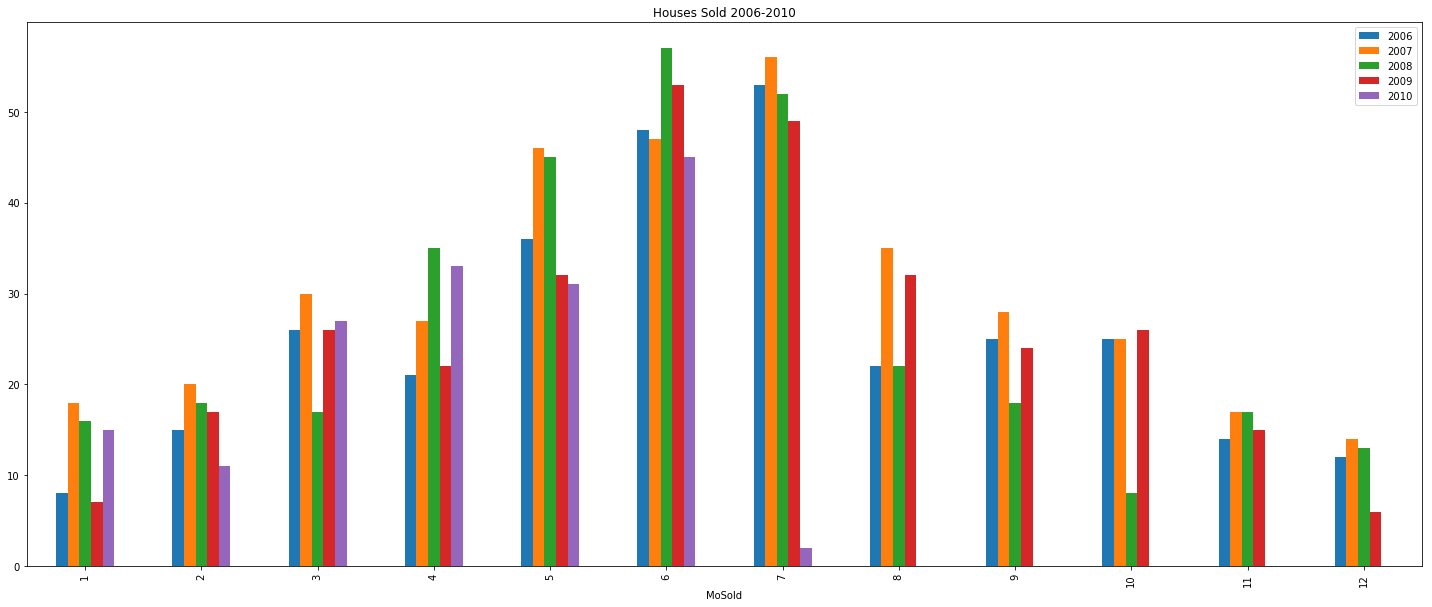

In [155]:
# 2006-2010
all_hd.plot(kind='bar', figsize=(25,10),title='Houses Sold 2006-2010')

In [156]:
# AVERAGE PRICES OF HOMES SOLD ON EACH MONTH OF THE YEAR

In [158]:
h_dprices = h_data[h_data.YrSold == 2006]
h_dprices1 = h_dprices.groupby('MoSold').SalePrice.mean()
h_dprices2006 = h_dprices1.to_frame()
h_dprices2006

h_dprices = h_data[h_data.YrSold == 2007]
h_dprices1 = h_dprices.groupby('MoSold').SalePrice.mean()
h_dprices2007 = h_dprices1.to_frame()
h_dprices2007

h_dprices = h_data[h_data.YrSold == 2008]
h_dprices1 = h_dprices.groupby('MoSold').SalePrice.mean()
h_dprices2008 = h_dprices1.to_frame()
h_dprices2008

h_dprices = h_data[h_data.YrSold == 2009]
h_dprices1 = h_dprices.groupby('MoSold').SalePrice.mean()
h_dprices2009 = h_dprices1.to_frame()
h_dprices2009

h_dprices = h_data[h_data.YrSold == 2010]
h_dprices1 = h_dprices.groupby('MoSold').SalePrice.mean()
h_dprices2010 = h_dprices1.to_frame()
h_dprices2010

all_hprices = pd.concat([h_dprices2006, h_dprices2007, h_dprices2008, h_dprices2009, h_dprices2010], axis=1)
col = ['AvgP2006', 'AvgP2007', 'AvgP2008', 'AvgP2009', 'AvgP2010']
all_hprices.columns = col
all_hprices

,AvgP2006,AvgP2007,AvgP2008,AvgP2009,AvgP2010
MoSold,,,,,
1,181021,176701,185218,176523,172620
2,174718,175567,166943,166912,171293
3,177407,177086,170411,171426,174540
4,170332,177704,174075,175398,168757
5,180469,178662,177437,178793,172140
6,177371,183482,179081,180937,177336
7,182576,179908,179249,178932,181998
8,187579,178163,179096,180642,NaN
9,192111,180215,181065,179919,NaN


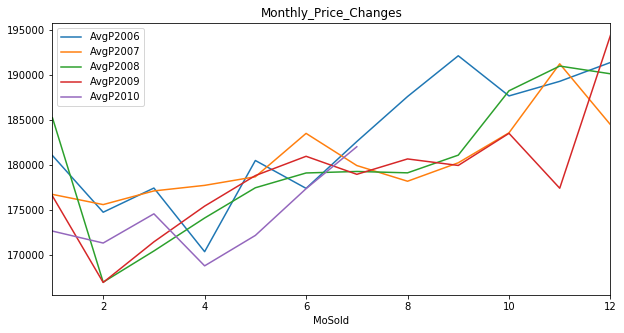

In [102]:
plt.figure(); all_hprices.plot(title='Monthly_Price_Changes',figsize=(10,5)); plt.legend(loc='best')

In [71]:
# AVERAGE BEDROOMS AND BATHROOMS OF HOUSES SOLD EACH MONTH OF EACH YEAR

In [72]:
# Number of bedrooms and bathrooms in 2006
h_drooms = h_data[h_data.YrSold == 2006]
h_dbrooms2006 = h_drooms.groupby('MoSold').BedroomAbvGr.mean()
h_dfbaths2006 = h_drooms.groupby('MoSold').FullBath.mean()
br_and_bth2006 = pd.concat([h_dbrooms2006,h_dfbaths2006], axis=1)
br_and_bth2006

# Number of bedrooms and bathrooms in 2007
h_drooms = h_data[h_data.YrSold == 2007]
h_dbrooms2007 = h_drooms.groupby('MoSold').BedroomAbvGr.mean()
h_dfbaths2007 = h_drooms.groupby('MoSold').FullBath.mean()
br_and_bth2007 = pd.concat([h_dbrooms2007,h_dfbaths2007], axis=1)
br_and_bth2007

# Number of bedrooms and bathrooms in 2008
h_drooms = h_data[h_data.YrSold == 2008]
h_dbrooms2008 = h_drooms.groupby('MoSold').BedroomAbvGr.mean()
h_dfbaths2008 = h_drooms.groupby('MoSold').FullBath.mean()
br_and_bth2008 = pd.concat([h_dbrooms2008,h_dfbaths2008], axis=1)
br_and_bth2008

# Number of bedrooms and bathrooms in 2009
h_drooms = h_data[h_data.YrSold == 2009]
h_dbrooms2009 = h_drooms.groupby('MoSold').BedroomAbvGr.mean()
h_dfbaths2009 = h_drooms.groupby('MoSold').FullBath.mean()
br_and_bth2009 = pd.concat([h_dbrooms2009,h_dfbaths2009], axis=1)
br_and_bth2009

# Number of bedrooms and bathrooms in 2010
h_drooms = h_data[h_data.YrSold == 2010]
h_dbrooms2010 = h_drooms.groupby('MoSold').BedroomAbvGr.mean()
h_dfbaths2010 = h_drooms.groupby('MoSold').FullBath.mean()
br_and_bth2010 = pd.concat([h_dbrooms2010,h_dfbaths2010], axis=1)
br_and_bth2010

# Build a new dataframe incluidng average bedrooms and bathrooms for months between 2006-2010.
all_br_and_bth = pd.concat([br_and_bth2006, br_and_bth2007,br_and_bth2008, br_and_bth2009, br_and_bth2010], axis=1)

col = ['Av_bd06','Av_bth06','Av_bd07','Av_bth07','Av_bd08','Av_bth08','Av_bd09','Av_bth09','Av_bd10','Av_bth10']
all_br_and_bth.columns = col
all_br_and_bth

,Av_bd06,Av_bth06,Av_bd07,Av_bth07,Av_bd08,Av_bth08,Av_bd09,Av_bth09,Av_bd10,Av_bth10
MoSold,,,,,,,,,,
1,3,2,3,2,3,2,3,2,3,2
2,3,2,3,2,2,1,2,2,3,2
3,3,1,3,2,3,2,3,2,3,2
4,3,1,3,2,3,2,3,2,2,2
5,3,2,3,2,3,1,3,2,3,2
6,3,1,3,2,3,2,3,2,3,1
7,3,2,3,2,3,2,3,2,3,1
8,3,2,3,2,3,2,3,2,NaN,NaN
9,3,2,3,2,3,2,3,1,NaN,NaN


In [ ]:
# AVERAGE PRICES FOR 3 BEDROOMS AND 2 BATHROOMS HOMES FROM EACH MONTH OF EACH YEAR.

In [97]:
#2006
h_bd_bth = h_data[h_data.YrSold == 2006]
h_bd_bth = h_bd_bth[h_bd_bth.BedroomAbvGr == 3]
h_bd_bth = h_bd_bth[h_bd_bth.FullBath == 2]

h_bd_bth = h_bd_bth.groupby('MoSold').SalePrice.mean()
h_bd_bth2006 = h_bd_bth.to_frame()
h_dprices2006

#2007
h_bd_bth = h_data[h_data.YrSold == 2007]
h_bd_bth = h_bd_bth[h_bd_bth.BedroomAbvGr == 3]
h_bd_bth = h_bd_bth[h_bd_bth.FullBath == 2]

h_bd_bth = h_bd_bth.groupby('MoSold').SalePrice.mean()
h_bd_bth2007 = h_bd_bth.to_frame()
h_dprices2007

# 2008
h_bd_bth = h_data[h_data.YrSold == 2008]
h_bd_bth = h_bd_bth[h_bd_bth.BedroomAbvGr == 3]
h_bd_bth = h_bd_bth[h_bd_bth.FullBath == 2]

h_bd_bth = h_bd_bth.groupby('MoSold').SalePrice.mean()
h_bd_bth2008 = h_bd_bth.to_frame()
h_dprices2008

# 2009
h_bd_bth = h_data[h_data.YrSold == 2009]
h_bd_bth = h_bd_bth[h_bd_bth.BedroomAbvGr == 3]
h_bd_bth = h_bd_bth[h_bd_bth.FullBath == 2]

h_bd_bth = h_bd_bth.groupby('MoSold').SalePrice.mean()
h_bd_bth2009 = h_bd_bth.to_frame()
h_dprices2009

# 2010
h_bd_bth = h_data[h_data.YrSold == 2010]
h_bd_bth = h_bd_bth[h_bd_bth.BedroomAbvGr == 3]
h_bd_bth = h_bd_bth[h_bd_bth.FullBath == 2]

h_bd_bth = h_bd_bth.groupby('MoSold').SalePrice.mean()
h_bd_bth2010 = h_bd_bth.to_frame()
h_dprices2010


# Table with average prices of homes with 3 bedrooms and 2 bathrooms for each month of each year
all_Avg_P = pd.concat([h_dprices2006, h_dprices2007, h_dprices2009, h_dprices2009, h_dprices2010], axis=1)
col = ['AvP3b_2bh_06', 'AvP3b_2bh_07', 'AvP3b_2bh_08', 'AvP3b_2bh_09', 'AvP3b_2bh_10']
all_Avg_P.columns = col
all_Avg_P

,AvP3b_2bh_06,AvP3b_2bh_07,AvP3b_2bh_08,AvP3b_2bh_09,AvP3b_2bh_10
MoSold,,,,,
1,181021,176701,176523,176523,172620
2,174718,175567,166912,166912,171293
3,177407,177086,171426,171426,174540
4,170332,177704,175398,175398,168757
5,180469,178662,178793,178793,172140
6,177371,183482,180937,180937,177336
7,182576,179908,178932,178932,181998
8,187579,178163,180642,180642,NaN
9,192111,180215,179919,179919,NaN


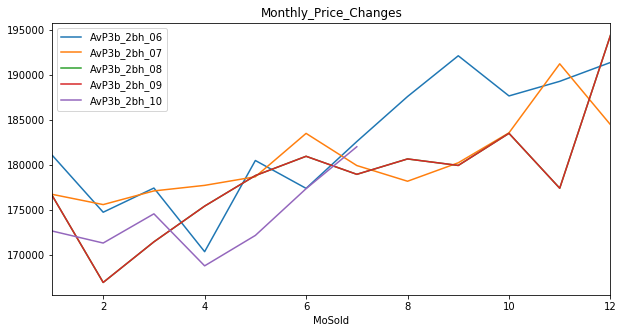

In [103]:
plt.figure(); all_Avg_P.plot(title='Monthly_Price_Changes',figsize=(10,5)); plt.legend(loc='best')

In [73]:
# WEATHER DATA

In [117]:
weather_d = pd.DataFrame.from_csv('WeatherData/weather.csv', index_col=None)
weather_d.head(3)

,STATION,STATION_NAME,DATE,MXPN,MNPN,EVAP,MDEV,DAEV,SX52,SX53,SX51,SN52,SN53,SN51,MDPR,DAPR,PRCP,SNWD,SNOW,TAVG,TMAX,TMIN,TOBS,WESD,WESF,AWND,WDF2,WDF5,WSF2,WSF5,PGTM,WDMV,WT09,WT01,WT06,WT05,WT02,WT11,WT04,WT08,WT03
0,GHCND:US1IASR0017,AMES 0.9 ENE IA US,20070825,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,9e-02,-9999,,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
1,GHCND:US1IASR0017,AMES 0.9 ENE IA US,20070826,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,0e+00,-9999,,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2,GHCND:US1IASR0017,AMES 0.9 ENE IA US,20070827,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,0e+00,-9999,,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999


In [178]:
weather_d1 = weather_d[weather_d.STATION_NAME == 'AMES 8 WSW IA US']
weather_d2 = weather_d1.set_index('DATE')
weather_d3 = weather_d2[['PRCP', 'SNOW', 'TMAX', 'TMIN']]
weather_d3.head()

,PRCP,SNOW,TMAX,TMIN
DATE,,,,
20060101,0.00,0.0,37,26
20060102,0.24,0.0,34,33
20060103,0.00,0.0,34,32
20060104,0.00,0.0,39,32
20060105,0.00,0.0,37,25
